# WINE QUALITY PREDICTION APP USING AWS SAGEMAKER'S IN-BUILT XGBOOST - End-to-End
We will build a Wine Quality Prediction App to help determine the quality of wine from its composition:
- I)   PROBLEM STATEMENT & DATA COLLECTION:

You want to automatically determine the quality of wine from it's underlying components.The data is taken from the UCI datasets and you can get it from the link.  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

This data will be cleaned and trained using the in-built XGBoost Algorithm on AWS Sagemaker, and an endpoint will be created in AWS ,which wll be used to make predictions when given the inputs on the components in the wine.

- II)  PERFORM EXPLORATORY DATA ANALYSIS 

Inspect the data to validate the quality of the data downloaded from te UCI website. Analyse the distribution of missing values, outliers and gain other relevant insights from the model
- III) DO FEATURE ENGINEERING & SELECTION

Handle the mising values, outliers and do the necessary transformations which will ensure the data is well suited for the machine learning model.And also to maximise the insights gotten from the Exploratory Data Analysis phase.
- IV)  BUILD,TRAIN AND DEPLOY THE MODEL IN SAGEMAKER

The Boto3 package will be used to create the S3 buckets to store the preprocessed dataset.The Sagemaker's inbuilt XGBoost algorithm, will be built, trained and deployed.Including the use of optimal hyperparameters to get the best results for the RMSE( Root Mean Squared Error).An Endpoint will be created after the model is built.
The Endpoint created awill be used to predict the quality of wine when the input compositions are fed to the endpoint.

### II) EXPLORATORY DATA ANALYSIS
We will perform the following tasks in order to successfully complete the EDA

- a.) Import the necessary Libraries and downloaded data
- b.) Get the Big Picture
- c.) Inspect Missing Values
- d.) Inspect the Dependent Variable
- e.) Inspect the Numeric Independendent Variables
- f.) Inspect Outliers
- g.) Find other relationships


#### a.) Import the necessary Libraries and downloaded data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore") 

In [3]:
#import the scraped data
dataset = pd.read_csv('winequality-red.csv', sep = ';')

In [4]:
#View first 10 observations
print(dataset.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

#### b.) Get the Big Picture

In [14]:
#Make a copy of the dataset and keep
data = dataset.copy()

In [17]:
#View the shape
data.shape

(1599, 11)

In [19]:
#View the columns info
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1599 entries, 7.4 to 6.0
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 149.9 KB


In [21]:
#View the number of unique categories per column
data.nunique()

volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [23]:
#Some descriptive statistics of the numeric variables
data.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### c.) Inspecting Missing Values

In [24]:
#Checking if any column has missing values
data.isnull().any()

volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
#Create a function to check for missing values in the dataset
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(),2),'% missing values' )

<AxesSubplot:ylabel='fixed acidity'>

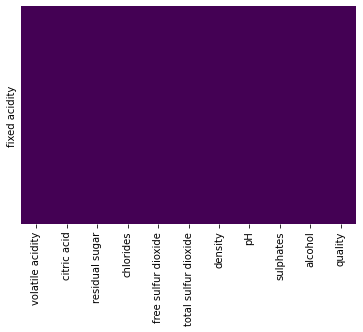

In [6]:
#Plotting a heatmap to visualise the missing values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So we see that there are no missing values.


#### d.) Inspect the Dependent Vaiable - quality

In [25]:
#View the frequency distribution for each quality value
data.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

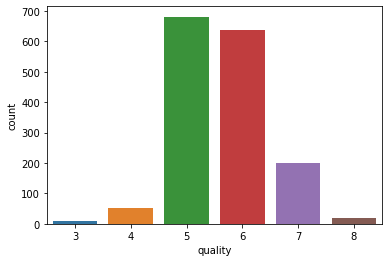

In [26]:
#Plot the count plot of the quality column
sns.countplot(x = "quality",data =data)

#### e.) Inspect the Numeric Variables 

In [27]:
#View the different data types
data.dtypes

volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [28]:
#Grouping all numeric variables
numerical_features = data.select_dtypes(include=["number"])
numerical_features.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### e.) i.) Creating discrete features

In [29]:
#Getting discrete features from the general numeric features with a threshol of 20 unique observations
discrete_features = [feature for feature in numerical_features if len(numerical_features[feature].unique()) < 20]
print(len(discrete_features), ": Discrete variables")

1 : Discrete variables


In [30]:
print(discrete_features)

['quality']


##### e.) ii.) Creating continuous features

In [31]:
#Getting continuous features from the general numeric features which are above the threshold of 20 unique observations
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(len(continous_features), ": Continuous variables")

10 : Continuous variables


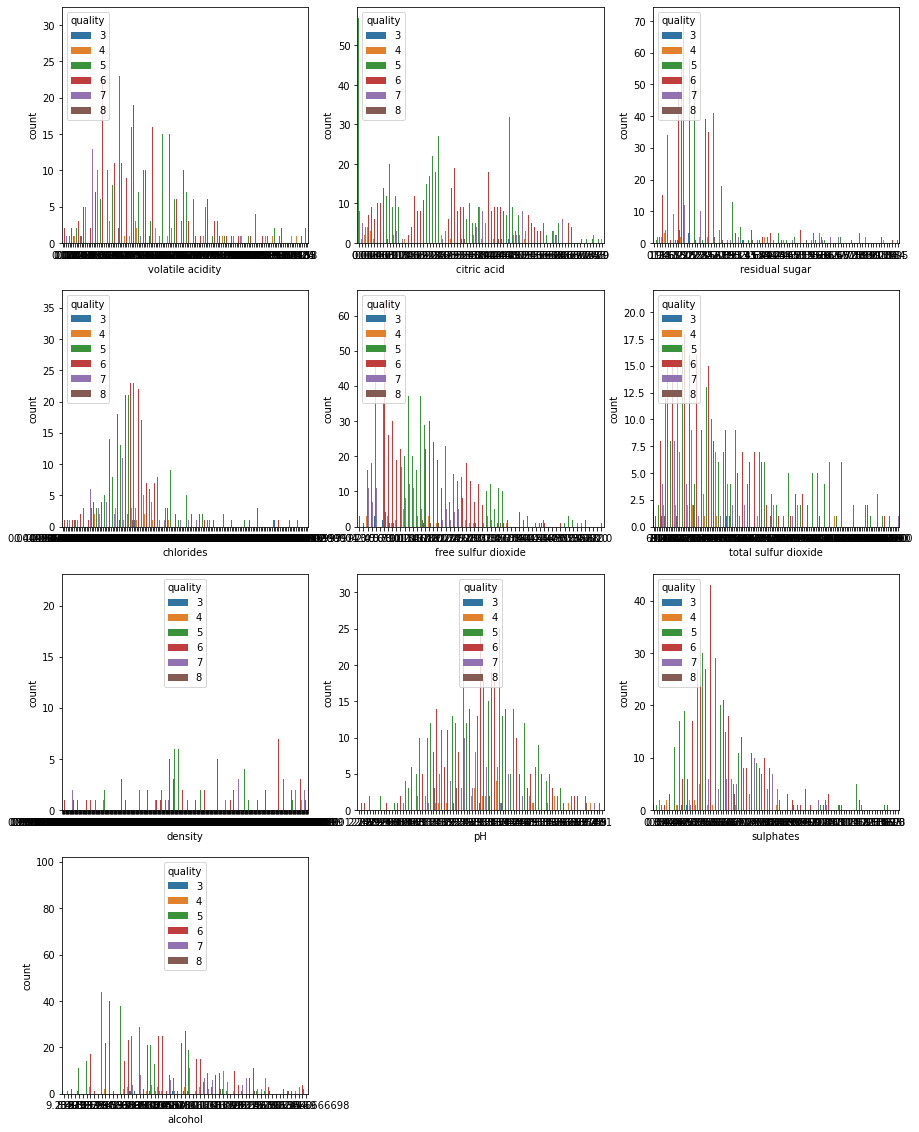

In [37]:

n_rows = 4
n_columns = 3

plt.figure(figsize=(15,20))
for i in enumerate(continous_features):
    plt.subplot(n_rows,n_columns,i[0]+1)
    sns.countplot(x= i[1],hue = 'quality', data = data)

#### f.) Inspect outliers

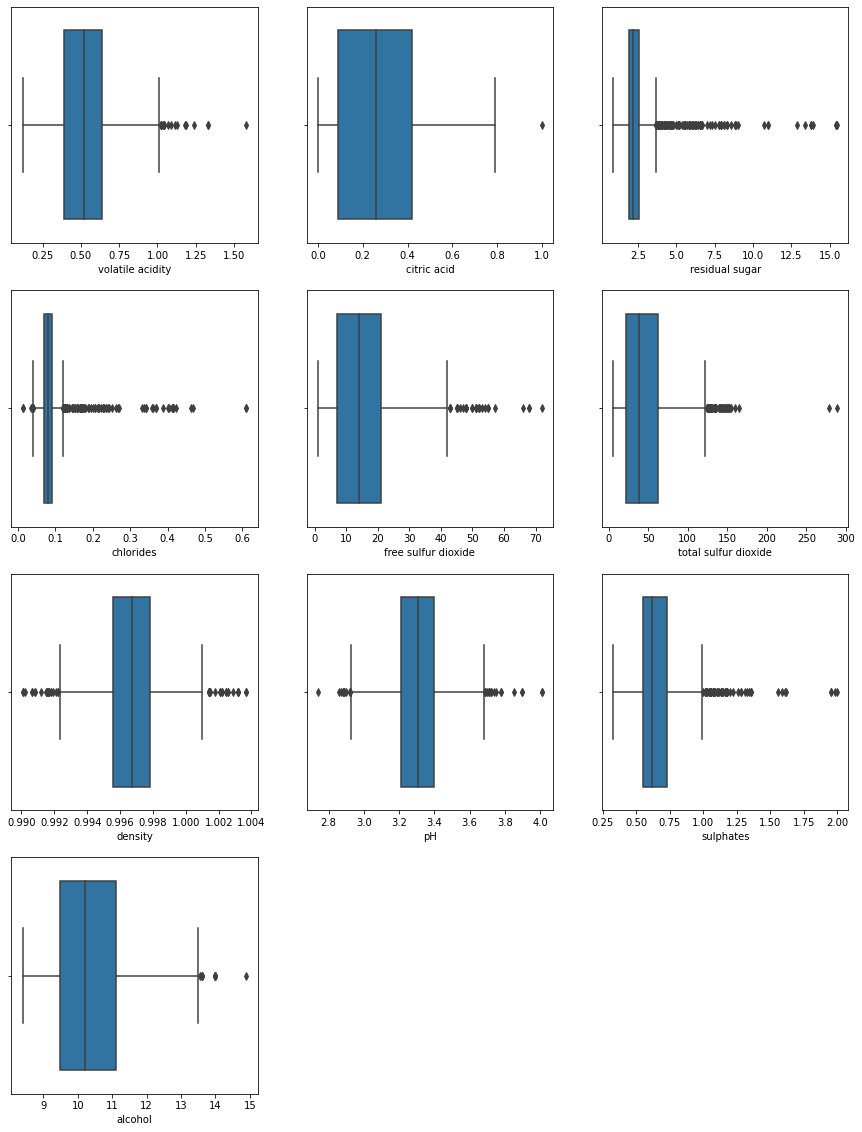

In [39]:
#Plot outliers from all the continuos variables
n_rows = 4
n_columns = 3

plt.figure(figsize=(15,20))
for i in enumerate(continous_features):
    plt.subplot(n_rows,n_columns,i[0]+1)
    sns.boxplot(x= i[1],hue = 'quality', data = data)

#### g.) Find other relationships

In [41]:
#Build a correlation matrix
corrMatrix = data.corr()
print(corrMatrix)

                      volatile acidity  citric acid  residual sugar  \
volatile acidity              1.000000    -0.552496        0.001918   
citric acid                  -0.552496     1.000000        0.143577   
residual sugar                0.001918     0.143577        1.000000   
chlorides                     0.061298     0.203823        0.055610   
free sulfur dioxide          -0.010504    -0.060978        0.187049   
total sulfur dioxide          0.076470     0.035533        0.203028   
density                       0.022026     0.364947        0.355283   
pH                            0.234937    -0.541904       -0.085652   
sulphates                    -0.260987     0.312770        0.005527   
alcohol                      -0.202288     0.109903        0.042075   
quality                      -0.390558     0.226373        0.013732   

                      chlorides  free sulfur dioxide  total sulfur dioxide  \
volatile acidity       0.061298            -0.010504              0.0

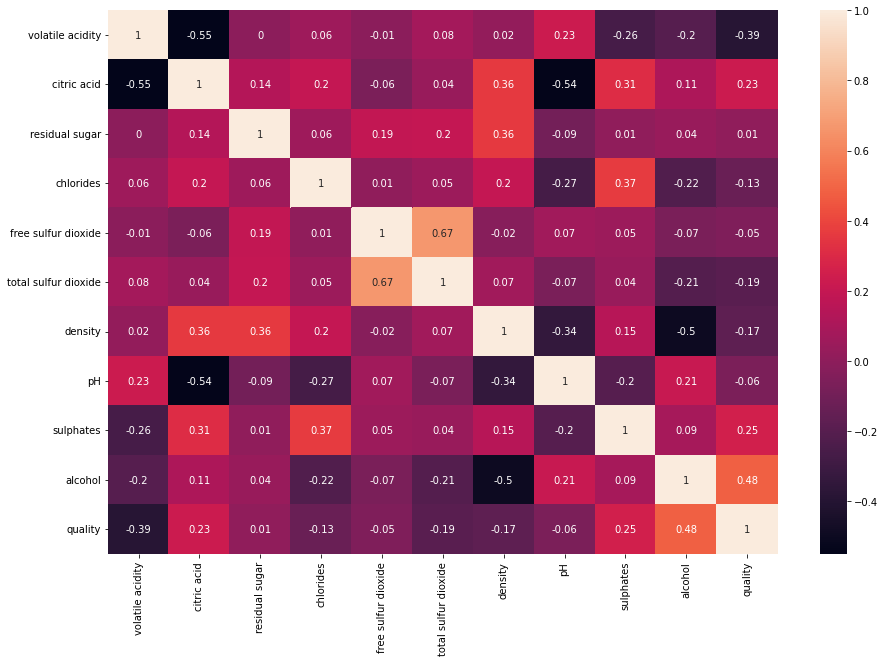

In [42]:
#Visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(np.round(corrMatrix,2), annot=True)
plt.show()